In [6]:
# Data for each column
#manual_mask_area = [39171, 24407, 55012, 58190, 48502, 49105, 56222, 64584, 55534, 26581]
#algorithm_mask_area = [33799, 25345, 33941, 31615, 30180, 32751, 38360, 43243, 37903, 18245]
#overlap_area = [28805, 17206, 32967, 30947, 29096, 32015, 36903, 40936, 36021, 16292]

# Print the first few rows to verify the data
#print(data.head())

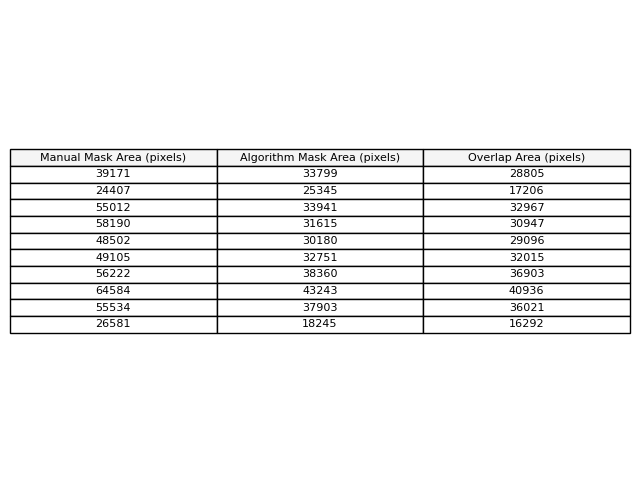

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Data for each column
manual_mask_area = [39171, 24407, 55012, 58190, 48502, 49105, 56222, 64584, 55534, 26581]
algorithm_mask_area = [33799, 25345, 33941, 31615, 30180, 32751, 38360, 43243, 37903, 18245]
overlap_area = [28805, 17206, 32967, 30947, 29096, 32015, 36903, 40936, 36021, 16292]

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Hide axes
ax.axis('off')

# Create the table
cell_text = []
for i in range(len(manual_mask_area)):
    cell_text.append([manual_mask_area[i], algorithm_mask_area[i], overlap_area[i]])

# Column labels
columns = ['Manual Mask Area (pixels)', 'Algorithm Mask Area (pixels)', 'Overlap Area (pixels)']

# Create the table and add it to the axisx
table = ax.table(cellText=cell_text, colLabels=columns, loc='center', cellLoc='center', colColours=['#f5f5f5']*3)

# Display the plot
plt.show()

In [8]:
!conda install seaborn -c conda-forge -y

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: win-64
Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\lmr20\miniconda3

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-3.4.1              |       ha4e3fda_0         8.1 MB  conda-forge
    pandas-2.2.2               |  py312h72972c8_1        13.5 MB  conda-forge
    patsy-1.0.1                |     pyhd8ed1ab_1         182 KB  conda-forge
    python-tzdata-2025.1       |     pyhd8ed1ab_0         140 KB  conda-forge
    scipy-1.15.1               |  py312h928f2a1_0        17.0 MB  conda-forge
    seaborn-0.13.2             |       hd8ed1ab_3           7 KB  conda-forge
    seaborn-base-0.13.2        |     pyhd8ed1ab_3         223 KB  conda-forge
    statsmodels-0.14.4         |  py312h1a27103_0        11.2 MB  conda-forge


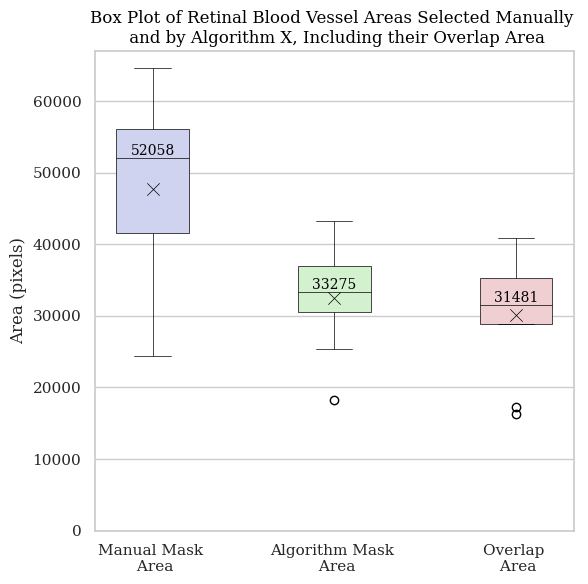

In [18]:
# REAL PLOT

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for each column
manual_mask_area = [39171, 24407, 55012, 58190, 48502, 49105, 56222, 64584, 55534, 26581]
algorithm_mask_area = [33799, 25345, 33941, 31615, 30180, 32751, 38360, 43243, 37903, 18245]
overlap_area = [28805, 17206, 32967, 30947, 29096, 32015, 36903, 40936, 36021, 16292]

# Define the colors with transparency
box_colors = ['#c9cff5', '#cff5c9', '#f5c9cf']  # Blue, Yellow, Red


# Set the seaborn style
sns.set_style('whitegrid',{'font.family':'serif', 'font.serif':'Times New Roman'})
#sns.set(style="whitegrid", palette="muted")

# Create a figure and axis for the box plot
fig, ax = plt.subplots(figsize=(6, 6))

##XXXXXXXXXX plt.rcParams['font.family'] = 'Times New Roman'

# Create a box plot with custom box colors and transparency
sns.boxplot(data=[manual_mask_area, algorithm_mask_area, overlap_area], ax=ax, width=0.4,
            palette=box_colors,flierprops={"markeredgecolor": 'black'},linewidth=0.5,linecolor='black')

# Set the labels for the box plot
ax.set_xticks([0, 1, 2])  # positions of the boxes
ax.set_xticklabels(['Manual Mask \n Area', 'Algorithm Mask \n Area', 'Overlap \n Area'])
ax.set_ylabel('Area (pixels)')
ax.set_title('Box Plot of Retinal Blood Vessel Areas Selected Manually \n and by Algorithm X, Including their Overlap Area', fontweight='normal', color='black')

# Set the y-axis to start from 0
ax.set_ylim(bottom=0)

# Add median annotations outside the boxes
for i, dataset in enumerate([manual_mask_area, algorithm_mask_area, overlap_area]):
    median_value = np.median(dataset)
    # Position the median just outside the top of the box
    ax.text(i, median_value + 2000, f'{median_value:.0f}', ha='center', va='top', fontweight='normal', color='black', fontsize=10)

# Add "X" marks for mean values inside the boxes
mean_values = [np.mean(manual_mask_area), np.mean(algorithm_mask_area), np.mean(overlap_area)]
for i, mean in enumerate(mean_values):
    ax.scatter(i, mean, color='black', marker='x', linewidth=0.5, s=80, zorder=3)  # Place 'X' at the mean

# Customize box outline and fill colors
for i, patch in enumerate(ax.artists):
    # Set the fill color with transparency
    patch.set_facecolor(box_colors[i])  # Set the fill color to transparent version
    patch.set_edgecolor('black')  # Set solid outline color (black)
    patch.set_linewidth(2)  # Set solid border width

plt.savefig('box_plot_final_ugly.png', dpi=300, bbox_inches='tight', pad_inches=1)

# Display the plot with both the box plot and the table
plt.tight_layout()
plt.show()



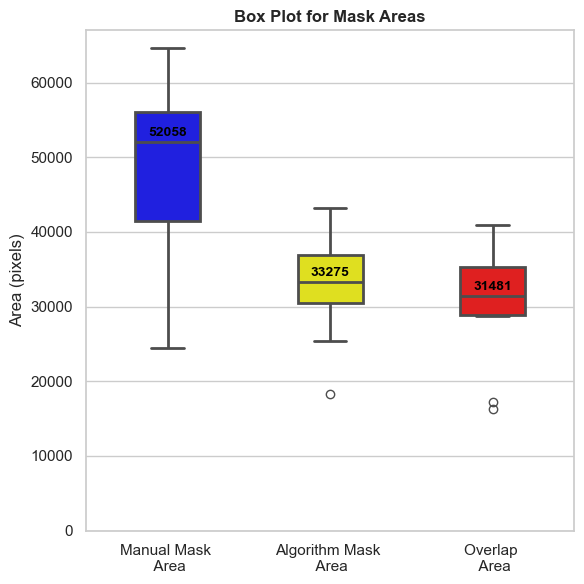

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data for each column
manual_mask_area = [39171, 24407, 55012, 58190, 48502, 49105, 56222, 64584, 55534, 26581]
algorithm_mask_area = [33799, 25345, 33941, 31615, 30180, 32751, 38360, 43243, 37903, 18245]
overlap_area = [28805, 17206, 32967, 30947, 29096, 32015, 36903, 40936, 36021, 16292]

# Define the colors with transparency
box_colors = ['#0000FF', '#FFFF00', '#FF0000']  # Blue, Yellow, Red
box_fill_colors = ['rgba(0, 0, 255, 0.3)', 'rgba(255, 255, 0, 0.3)', 'rgba(255, 0, 0, 0.3)']  # Transparent fill

# Create a figure and axis for the box plot
fig, ax = plt.subplots(figsize=(6, 6))

# Set the seaborn style
sns.set(style="whitegrid", palette="muted")

# Create a box plot with custom box colors and transparency
sns.boxplot(data=[manual_mask_area, algorithm_mask_area, overlap_area], ax=ax, width=0.4,
            palette=box_colors, fliersize=6, linewidth=2)

# Customize box outline and fill colors
for i, patch in enumerate(ax.artists):
    # Set the fill color with transparency
    patch.set_facecolor(box_fill_colors[i])  # Set the fill color to transparent version
    patch.set_edgecolor(box_colors[i])  # Set solid outline color (blue, yellow, red)
    patch.set_linewidth(2)  # Set solid border width

# Set the labels for the box plot
ax.set_xticks([0, 1, 2])  # positions of the boxes
ax.set_xticklabels(['Manual Mask \n Area', 'Algorithm Mask \n Area', 'Overlap \n Area'])
ax.set_ylabel('Area (pixels)')
ax.set_title('Box Plot for Mask Areas', fontweight='bold')

# Set the y-axis to start from 0
ax.set_ylim(bottom=0)

# Add median annotations outside the boxes
for i, dataset in enumerate([manual_mask_area, algorithm_mask_area, overlap_area]):
    median_value = np.median(dataset)
    # Position the median just outside the top of the box
    ax.text(i, median_value + 2000, f'{median_value:.0f}', ha='center', va='top', fontweight='bold', color='black', fontsize=10)

# Display the plot with both the box plot and the table
plt.tight_layout()
plt.show()
